# 使用Feature importance大於0的特徵進行篩選的模型視覺化，不會有大類別、子類別的問題

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties

# 獲取當前工作目錄
# 獲取當前工作目錄
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
version3_path = os.path.join(parent_dir, "Version3")

# 暫時將工作目錄切換到 Version3
os.chdir(version3_path)

from utils.model_score import *
import seaborn as sns
from matplotlib.font_manager import FontProperties
import pickle

try:
    myfont = FontProperties(fname=r"/System/Library/Fonts/PingFang.ttc")
    sns.set(style="whitegrid", font=myfont.get_name())
except Exception as e:
    print(e)
    
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

[Errno 2] No such file or directory: 'C:\\System\\Library\\Fonts\\PingFang.ttc'


In [28]:
# Define file paths and variable names for logistic models
logistic_file_paths = [
    "../Models/ModelPerformanceNofoldImportance/logistic/pass_out.pkl",
    "../Models/ModelPerformanceNofoldImportance/logistic/pass_0.pkl",
    "../Models/ModelPerformanceNofoldImportance/logistic/car_0.pkl",
    "../Models/ModelPerformanceNofoldImportance/logistic/car_motor_out_overlap.pkl",
    "../Models/ModelPerformanceNofoldImportance/logistic/motor_0.pkl",
    "../Models/ModelPerformanceNofoldImportance/logistic/full_data.pkl"
]

# Define file paths and variable names for svc models
svc_file_paths = [
    "../Models/ModelPerformanceNofoldImportance/svc/pass_out.pkl",
    "../Models/ModelPerformanceNofoldImportance/svc/pass_0.pkl",
    "../Models/ModelPerformanceNofoldImportance/svc/car_0.pkl",
    "../Models/ModelPerformanceNofoldImportance/svc/car_motor_out_overlap.pkl",
    "../Models/ModelPerformanceNofoldImportance/svc/motor_0.pkl",
    "../Models/ModelPerformanceNofoldImportance/svc/full_data.pkl"
]

variable_names = [
    "pass_out", "pass_0",
    "car_0",
    "motor_0",
    "car_motor_out_overlap",
    "full_data"
]

# Function to load pickle files
def load_pickle_files(file_paths, variable_names):
    data = {}
    for file_path, var_name in zip(file_paths, variable_names):
        with open(file_path, "rb") as f:
            data[var_name] = pickle.load(f)
    return data

In [19]:
def calculate_recall_precision(confusion_matrix):
    """
    Calculate recall and precision from a given confusion matrix.
    
    Parameters:
        confusion_matrix (numpy.ndarray): A 2x2 confusion matrix.
                                         [[TP, FP],
                                          [FN, TN]]
    
    Returns:
        recall (float): Recall value.
        precision (float): Precision value.
    """
    # Extract values from the confusion matrix
    TP = confusion_matrix[1, 1]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    TN = confusion_matrix[0, 0]

    recall = TP / (TP + FN)
    precision = TP / (TP + FP)

    return recall, precision

In [29]:
# Load logistic and svc models
logistic_data = load_pickle_files(logistic_file_paths, variable_names)
svc_data = load_pickle_files(svc_file_paths, variable_names)

# Process logistic data
poo_mtrx, poo_recall, poo_precision, poo_class, poo_threshold = get_score(
    logistic_data['pass_out']['y'], logistic_data['pass_out']['decision_scores'])
p0_mtrx, p0_recall, p0_precision, p_class, p0_threshold = get_score(
    logistic_data['pass_0']['y'], logistic_data['pass_0']['decision_scores'])
m0_mtrx, m0_recall, m0_precision, m_class, m0_threshold = get_score(
    logistic_data['motor_0']['y'], logistic_data['motor_0']['decision_scores'])
c0_mtrx, c0_recall, c0_precision, c_class, c0_threshold = get_score(
    logistic_data['car_0']['y'], logistic_data['car_0']['decision_scores'])
cmoo_mtrx, coo_recall, coo_precision, coo_class, coo_threshold = get_score(
    logistic_data['car_motor_out_overlap']['y'], logistic_data['car_motor_out_overlap']['decision_scores'])

tp_mtrx = poo_mtrx + p0_mtrx + m0_mtrx + c0_mtrx + cmoo_mtrx
tp_recall, tp_precision = calculate_recall_precision(tp_mtrx)

fd_mtrx, fd_recall, fd_precision, fd_class, fd_threshold = get_score(
    logistic_data['full_data']['y'], logistic_data['full_data']['decision_scores'])

# Process svc data
poo_mtrx_svc, poo_recall_svc, poo_precision_svc, poo_class_svc, poo_threshold_svc = get_score(
    svc_data['pass_out']['y'], svc_data['pass_out']['decision_scores'])
p0_mtrx_svc, p0_recall_svc, p0_precision_svc, p_class_svc, p0_threshold_svc = get_score(
    svc_data['pass_0']['y'], svc_data['pass_0']['decision_scores'])
m0_mtrx_svc, m0_recall_svc, m0_precision_svc, m_class_svc, m0_threshold_svc = get_score(
    svc_data['motor_0']['y'], svc_data['motor_0']['decision_scores'])
c0_mtrx_svc, c0_recall_svc, c0_precision_svc, c_class_svc, c0_threshold_svc = get_score(
    svc_data['car_0']['y'], svc_data['car_0']['decision_scores'])
cmoo_mtrx_svc, coo_recall_svc, coo_precision_svc, coo_class_svc, coo_threshold_svc = get_score(
    svc_data['car_motor_out_overlap']['y'], svc_data['car_motor_out_overlap']['decision_scores'])

tp_mtrx_svc = poo_mtrx_svc + p0_mtrx_svc + m0_mtrx_svc + c0_mtrx_svc + cmoo_mtrx_svc
tp_recall_svc, tp_precision_svc = calculate_recall_precision(tp_mtrx_svc)

fd_mtrx_svc, fd_recall_svc, fd_precision_svc, fd_class_svc, fd_threshold_svc = get_score(
    svc_data['full_data']['y'], svc_data['full_data']['decision_scores'])

In [32]:
tp_mtrx, tp_recall, tp_precision, \
fd_mtrx, fd_recall, fd_precision

(array([[92, 45],
        [40, 97]], dtype=int64),
 0.708029197080292,
 0.6830985915492958,
 array([[125,  40],
        [ 78,  87]], dtype=int64),
 0.5272727272727272,
 0.6850393700787402)

In [33]:
tp_mtrx_svc, tp_recall_svc, tp_precision_svc, \
fd_mtrx_svc, fd_recall_svc, fd_precision_svc

(array([[108,  29],
        [ 58,  79]], dtype=int64),
 0.5766423357664233,
 0.7314814814814815,
 array([[ 88,  77],
        [ 37, 128]], dtype=int64),
 0.7757575757575758,
 0.624390243902439)

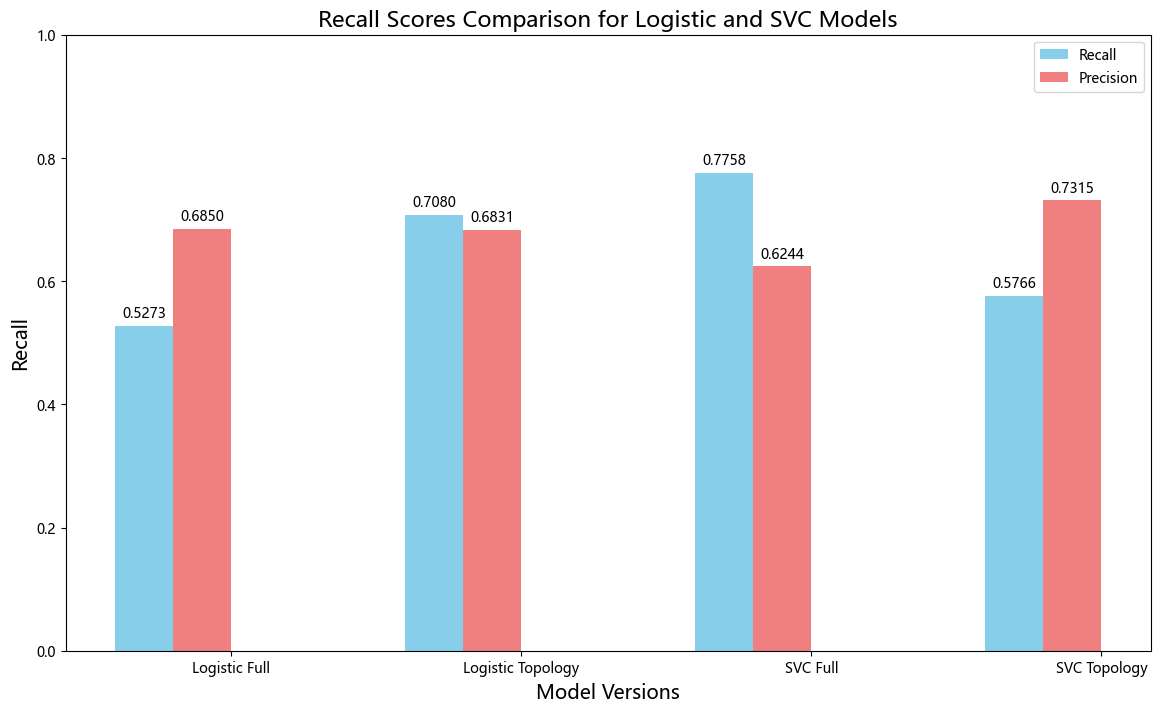

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Logistic Full', 'Logistic Topology', 'SVC Full', 'SVC Topology']
recall = [fd_recall, tp_recall, fd_recall_svc, tp_recall_svc]
precision = [fd_precision, tp_precision, fd_precision_svc, tp_precision_svc]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - 1.5*width, recall, width, label='Recall', color='skyblue')
bars2 = ax.bar(x - 0.5*width, precision, width, label='Precision', color='lightcoral')

# Add labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add title and labels
ax.set_title('Recall Scores Comparison for Logistic and SVC Models', fontsize=16)
ax.set_xlabel('Model Versions', fontsize=14)
ax.set_ylabel('Recall', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)  # Ensure the y-axis starts at 0 and ends at 1
ax.legend()

# Show the plot
plt.show()